# 
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114122048.png)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
SEED = 42
rng = np.random.default_rng(SEED)

In [ ]:
N_max = 100
Ns = np.arange(1,N_max+1)
P_a = 100 
P_b = [100,1000,10000]
P_c = 1000 

def sample_uniform_in_cube(P,N,rng): #################
    return rng.uniform(-1.0,1.0,size=(P,N))

def sample_gaussian_clipped(P,N,rng):#################
    x = rng.normal(-1.0,1.0, size=(P,N))
    return np.clip(x,-1.0,1.0)

def min_g_over_samples(samples):
    vals = np.sum(samples**2, axis=1)
    return float(np.min(vals))


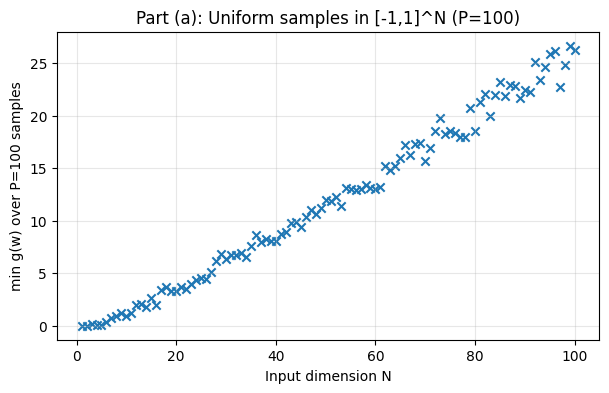

In [23]:
# ----------------------------
# (a)  P=100, N=1..100, Uniform[-1,1]^N
# ----------------------------
mins_uniform_P100 = []
for N in Ns:
    X = sample_uniform_in_cube(P_a, N, rng)
    mins_uniform_P100.append(min_g_over_samples(X))

plt.figure(figsize=(7,4))
plt.scatter(Ns, mins_uniform_P100, marker='x')
plt.xlabel("Input dimension N")
plt.ylabel("min g(w) over P=100 samples")
plt.title("Part (a): Uniform samples in [-1,1]^N (P=100)")
plt.grid(alpha=0.3)
plt.show()

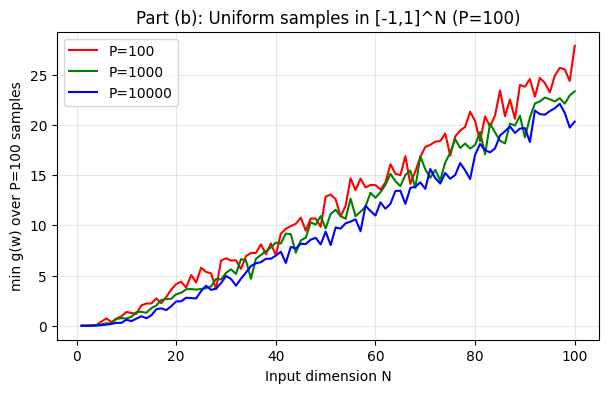

In [24]:
# ----------------------------
# (b) P=100,1000,10000; N=1..100, Uniform[-1,1]^N
# ----------------------------
mins_by_P = {}
for P in P_b:
    min_list = []
    rng_b = np.random.default_rng(12345+P)
    for N in Ns:
        X = sample_uniform_in_cube(P, N, rng_b)
        min_list.append(min_g_over_samples(X))
    mins_by_P[P]=np.array(min_list)

plt.figure(figsize=(7,4))
clr_list={
    100:'r',
    1000:'g',
    10000:'b'
}
for P in P_b:
    plt.plot(Ns, mins_by_P[P],color=clr_list[P],label=f'P={P}')
plt.legend()
plt.xlabel("Input dimension N")
plt.ylabel("min g(w) over P=100 samples")
plt.title("Part (b): Uniform samples in [-1,1]^N (P=100)")
plt.grid(alpha=0.3)
plt.show()

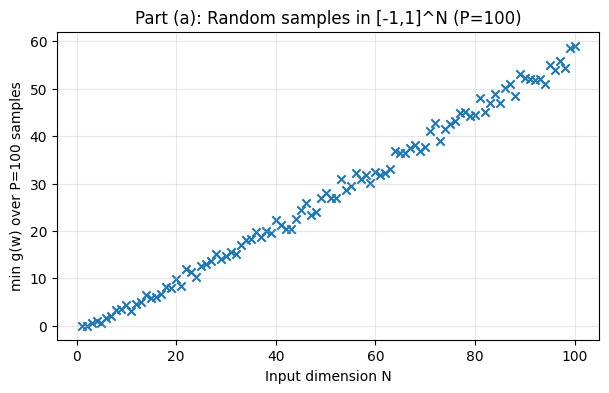

In [25]:
# ----------------------------
# (a)  P=100, N=1..100, Uniform[-1,1]^N
# ----------------------------
mins_uniform_P100 = []
for N in Ns:
    X = sample_gaussian_clipped(P_a, N, rng)
    mins_uniform_P100.append(min_g_over_samples(X))

plt.figure(figsize=(7,4))
plt.scatter(Ns, mins_uniform_P100, marker='x')
plt.xlabel("Input dimension N")
plt.ylabel("min g(w) over P=100 samples")
plt.title("Part (a): Random samples in [-1,1]^N (P=100)")
plt.grid(alpha=0.3)
plt.show()

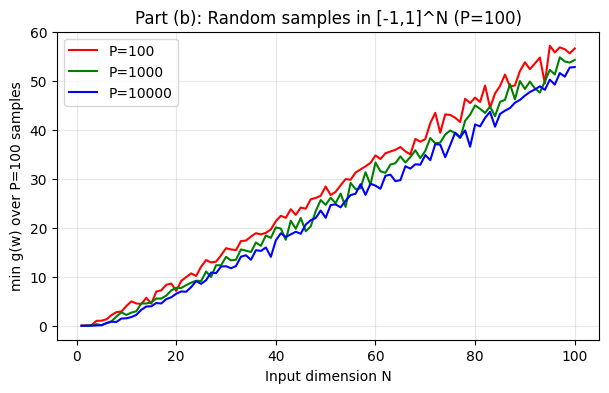

In [26]:
# ----------------------------
# (b) P=100,1000,10000; N=1..100, Uniform[-1,1]^N
# ----------------------------
mins_by_P = {}
for P in P_b:
    min_list = []
    rng_b = np.random.default_rng(12345+P)
    for N in Ns:
        X = sample_gaussian_clipped(P, N, rng_b)
        min_list.append(min_g_over_samples(X))
    mins_by_P[P]=np.array(min_list)

plt.figure(figsize=(7,4))
clr_list={
    100:'r',
    1000:'g',
    10000:'b'
}
for P in P_b:
    plt.plot(Ns, mins_by_P[P],color=clr_list[P],label=f'P={P}')
plt.legend()
plt.xlabel("Input dimension N")
plt.ylabel("min g(w) over P=100 samples")
plt.title("Part (b): Random samples in [-1,1]^N (P=100)")
plt.grid(alpha=0.3)
plt.show()

# 
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114125502.png)  
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114125713.png)

In [27]:
import numpy as np 
import matplotlib.pyplot as plt 
SEED = 42 
rng = np.random.default_rng(SEED)

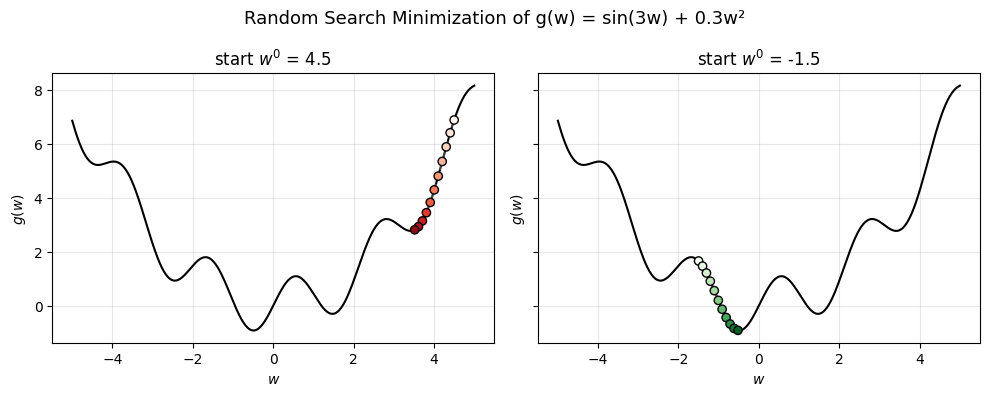

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---- 定义目标函数 ----
def g(w):
    return np.sin(3*w) + 0.3*w**2

# ---- 随机搜索算法 ----
def random_search_1d(w0, alpha=0.1, K=10, P=100, seed=None):
    rng = np.random.default_rng(seed)
    w = w0
    ws, gs = [w], [g(w)]
    for k in range(K):
        dirs = rng.uniform(-1, 1, P)          
        candidates = w - alpha * dirs         
        vals = g(candidates)
        best = np.argmin(vals)
        w = candidates[best]                  
        ws.append(w)
        gs.append(vals[best])
    return np.array(ws), np.array(gs)

# ---- 2 experiments ----
runs = [
    {"w0": 4.5, "color": "Reds", "seed": 0},   
    {"w0": -1.5, "color": "Greens", "seed": 1} 
]

x = np.linspace(-5, 5, 400)
y = g(x)

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

for ax, run in zip(axes, runs):
    ws, gs = random_search_1d(run["w0"], alpha=0.1, K=10, P=100, seded=run["seed"])
    cmap = plt.get_cmap(run["color"])
    colors = [cmap(i / len(ws)) for i in range(len(ws))]

    # 绘制函数曲线
    ax.plot(x, y, "k", lw=1.5)
    # 绘制每步结果
    ax.scatter(ws, gs, c=colors, edgecolor="k", zorder=3)
    # 绘制路径线
    ax.plot(ws, gs, "--", color="gray", alpha=0.5)
    # 标签
    ax.set_xlabel(r"$w$")
    ax.set_ylabel(r"$g(w)$")
    ax.set_title(f"start $w^0$ = {run['w0']}")
    ax.grid(alpha=0.3)

plt.suptitle("Random Search Minimization of g(w) = sin(3w) + 0.3w²", fontsize=13)
plt.tight_layout()
plt.show()


# 
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114131707.png)

In [37]:
import numpy as np 
import matplotlib.pyplot as plt 
SEED = 42 
rnp = np.random.default_rng(SEED)

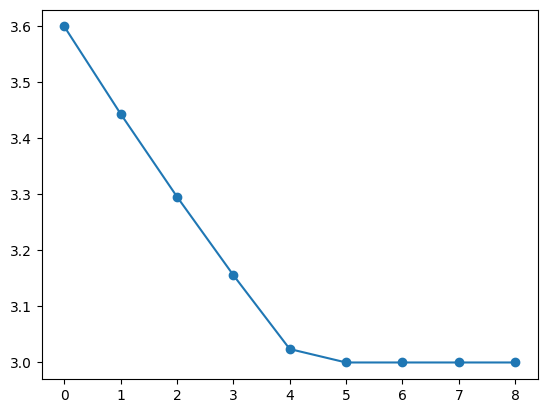

In [84]:
def g(w):
    val = np.array(np.tanh(4*w[...,0]+4*w[...,1]) + np.maximum(0.4*w[...,0]**2, 1) + 1)
    return val

def sample_random(P,N,rnp):
    d = rnp.normal(0,1,(P,N))
    d = d / np.linalg.norm(d, axis=1, keepdims=True)
    return d 

def random_search(alpha, w_0, iter_step, P, N):
    w_min = w_0.reshape(2,)
    g_min = float(g(w_0))
    ws_min = [w_min]
    gs_min = [g_min]

    for i in range(iter_step):
        w_new = w_min + alpha * sample_random(P,N,rnp)
        g_new = g(w_new) 
        best_index = np.argmin(g_new)
        best_w = w_new[best_index]
        if g(best_w) < g_min:
            w_min = best_w
            g_min = g(best_w)
            ws_min.append(w_min)
            gs_min.append(g_min)

    ws_min = np.vstack(np.array(ws_min))
    gs_min = np.array(gs_min)
    return ws_min, gs_min

alpha = 0.1
w_0 = np.array([[2.0,2.0]])
P = 1000
N = 2
iter = 8
ws_min, gs_min = random_search(alpha, w_0, iter, P, N)
cmap = plt.get_cmap('Reds')
colors = [cmap(i / len(ws_min)) for i in range(len(ws_min))]

plt.plot(np.arange(len(gs_min)), gs_min,marker='o')


# 
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114142556.png)  
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114142608.png)

In [85]:
import numpy as np 
import matplotlib.pyplot as plt 
SEED = 42 
rnp = np.random.default_rng(SEED)

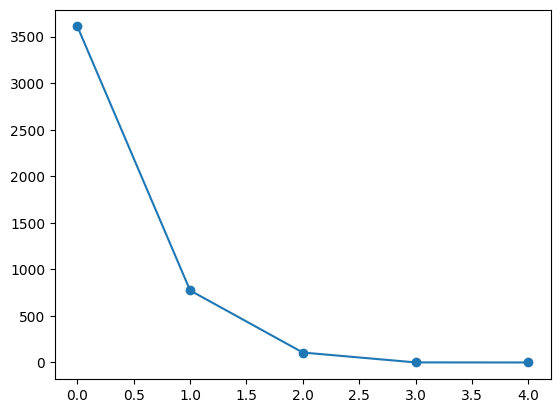

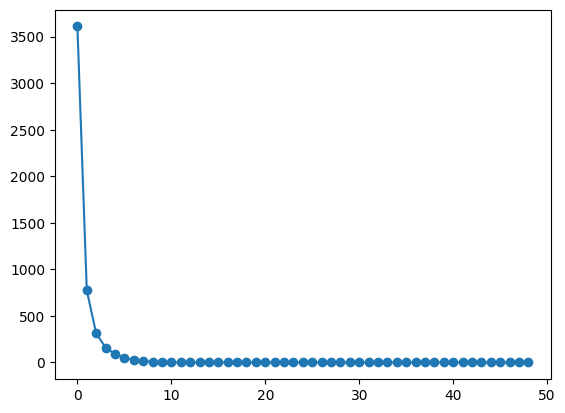

In [101]:
def g(w):
    val = 100 * (w[...,1] - w[...,0] ** 2) ** 2 + (w[...,0] - 1) ** 2
    return val

def sample_random(P,N,rnp):
    d = rnp.normal(0,1,(P,N))
    d = d / np.linalg.norm(d, axis=1, keepdims=True)
    return d

def random_search_diminish_step(alpha, iter, w_0, P, N, rnp):
    w_min = w_0.reshape(2,)
    g_min = g(w_min)
    ws_min = [w_min]
    gs_min = [g_min]
    for i in range(iter):
        if isinstance(alpha, str):
            step = 1 / (i + 1)
        else:
            step = alpha
        w_new = w_min + step * sample_random(P,N,rnp)
        g_new = g(w_new)
        best = np.argmin(g_new)
        best_w = w_new[best]
        best_g = g(best_w)
        if best_g < g_min:
            g_min = best_g 
            w_min = best_w 
            ws_min.append(w_min)
            gs_min.append(g_min)
    ws_min = np.stack(np.array(ws_min), axis=0)
    gs_min = np.array(gs_min)
    return ws_min, gs_min 

runs = [
    {'w_0': np.array([[-2, -2]]), 'P': 1000, 'K': 50, 'alpha': 1},
    {'w_0': np.array([[-2, -2]]), 'P': 1000, 'K': 50, 'alpha': 'diminish'},
]

for i, run in enumerate(runs):
    plt.figure()
    _, gs_min = random_search_diminish_step(run['alpha'], run['K'], run['w_0'], 1000, 2, np.random.default_rng(SEED+i))
    plt.plot(np.arange(len(gs_min)), gs_min, marker='o')

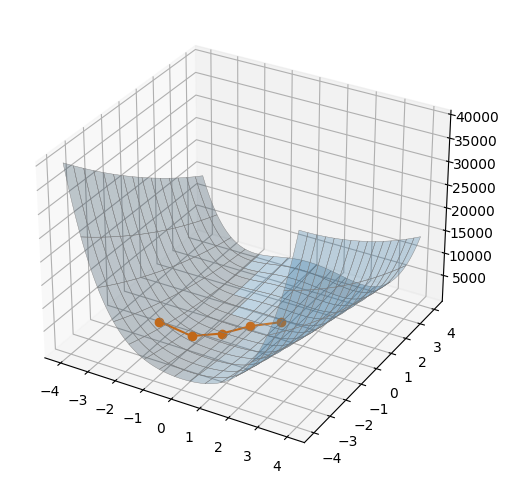

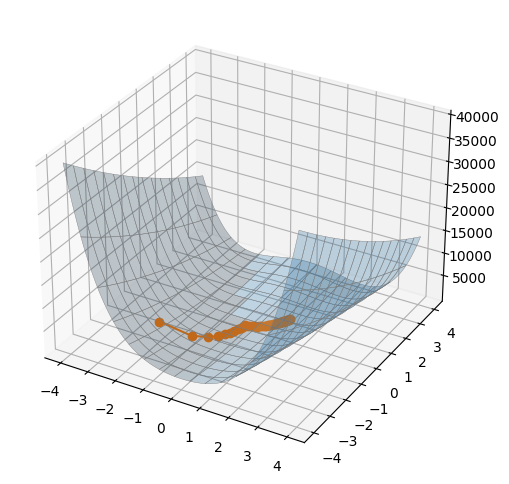

In [107]:
runs = [
    {'w_0': np.array([[-2, -2]]), 'P': 1000, 'K': 50, 'alpha': 1},
    {'w_0': np.array([[-2, -2]]), 'P': 1000, 'K': 50, 'alpha': 'diminish'},
]

for i, run in enumerate(runs):
    ws_min, gs_min = random_search_diminish_step(run['alpha'], run['K'], run['w_0'], 1000, 2, np.random.default_rng(SEED+i))

    x = np.linspace(-4, 4, 120)
    y = np.linspace(-4, 4, 120)
    X, Y = np.meshgrid(x, y)
    Z = 100*(Y - X**2)**2+(X-1)**2

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=8, cstride=8, edgecolor='gray', linewidth=0.3, alpha=0.25)
    ax.plot(ws_min[:,0], ws_min[:,1], gs_min, marker='o')

# 
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114154805.png)

# 
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114162901.png)  
![image.png](https://raw.githubusercontent.com/Pokemongle/img_bed_0/main/img/20251114162907.png)  


In [108]:
import numpy as np 
import matplotlib.pyplot as plt 
SEED = 42
rnp = np.random.default_rng(SEED)

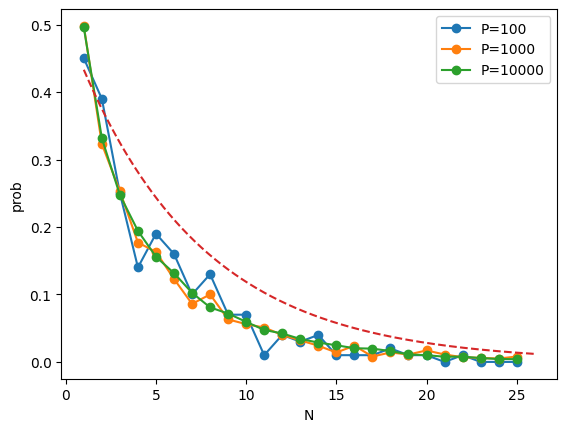

In [134]:
def g(w):
    val = np.sum(w**2, axis=1) + 2
    return val 

def sample_random(P,N,rnp):
    d = rnp.normal(0,1,(P,N))
    d = d / np.linalg.norm(d, axis=1, keepdims=True)
    return d

def prob_of_descend(P, N, rnp):
    w_0 = np.zeros((N,1)).T
    w_0[0,0]=1.0
    candidates = w_0 + sample_random(P, N, rnp)
    gs = g(candidates)
    prob = np.mean(gs < g(w_0))
    return prob

P_list = [100,1000,10000]
for P in P_list:
    prob_list = []
    for N in range(25):
        prob = prob_of_descend(P, N+1, rnp)
        prob_list.append(prob)
    prob_list = np.array(prob_list)
    plt.plot(np.arange(1, len(prob_list)+1), prob_list, marker='o', label=f'P={P}')
x = np.linspace(1,26,1000)
y = 0.5 * (np.sqrt(3) / 2) ** x
plt.plot(x, y, linestyle='--')
plt.xlabel('N')
plt.ylabel('prob')
plt.legend()